### Bootstrap

#### Packages

In [73]:
import pandas as pkg_pandas
import math as pkg_math
from matplotlib import pyplot as pkg_plot
from sklearn import model_selection as pkg_model_selection
from sklearn import preprocessing as pkg_preprocessing
from sklearn import tree as pkg_tree
from sklearn import metrics as pkg_metrics
import seaborn as pkg_seaborn

#### Load Data

In [74]:
loaded_df = pkg_pandas.read_csv("../data/cbex-titanic-passengers.csv")
loaded_df

,passenger_id,survived,passenger_class,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Preprocessing

#### Pre-Work

In [75]:
def label_encode_field(dataset_df, field_name):
    encoded_field_index = dataset_df.columns.get_loc(field_name) + 1
    encoded_field_name = '_'.join([field_name, 'number'])
    encoded_field_values = pkg_preprocessing.LabelEncoder().fit_transform(dataset_df[field_name])
    dataset_df.insert(loc=encoded_field_index, column=encoded_field_name, value=encoded_field_values, allow_duplicates=True)
    dataset_df = dataset_df.drop(columns=[field_name])
    return dataset_df

#### Encode Columns with non-numerical values

In [76]:
# Initialize
encoded_df = loaded_df[['passenger_class', 'sex', 'age', 'fare', 'survived']]
encoded_df.head(5)

,passenger_class,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [77]:
encoded_df = label_encode_field(encoded_df, 'sex')
encoded_df.head(5)

,passenger_class,sex_number,age,fare,survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [78]:
encoded_df.age = encoded_df.age.fillna(pkg_math.floor(encoded_df.age.median()))
encoded_df

,passenger_class,sex_number,age,fare,survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
...,...,...,...,...,...
886,2,1,27.0,13.0000,0
887,1,0,19.0,30.0000,1
888,3,0,28.0,23.4500,0
889,1,1,26.0,30.0000,1


In [79]:
encoded_df.to_csv("../.outputs/.datasets/cbex-titanic-passengers-encoded.csv", index=False)

### Analysis

#### Pre-Work

In [80]:
# Initialize
baseline_df  = encoded_df
baseline_df.head(5)

,passenger_class,sex_number,age,fare,survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [81]:
output_column_name = 'survived'
baseline_outputs = baseline_df[output_column_name]
baseline_inputs = baseline_df.drop(columns=[output_column_name])

train_inputs, test_inputs, train_outputs, test_outputs  = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.25)

print("=== Baseline Split - Train and Test ===")
print("Lengths: Baseline = {}, Train = {}, Test = {}".format(len(baseline_inputs), len(train_inputs), len(test_inputs)))

=== Baseline Split - Train and Test ===
Lengths: Baseline = 891, Train = 668, Test = 223


#### Model: Train (Fit)

In [82]:
model = pkg_tree.DecisionTreeClassifier()
model.fit(X=train_inputs, y=train_outputs)
model

DecisionTreeClassifier()

In [83]:
baseline_score = model.score(baseline_inputs, baseline_outputs)
train_score = model.score(train_inputs, train_outputs)
test_score = model.score(test_inputs, test_outputs)
print("Score: Baseline = {}, Train = {}, Test = {}".format(baseline_score, train_score, test_score))

Score: Baseline = 0.9225589225589226, Train = 0.9850299401197605, Test = 0.7354260089686099


#### Confusion Matrix

In [84]:
predicted_outputs = model.predict(test_inputs)
predicted_outputs

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1])

In [85]:
cm = pkg_metrics.confusion_matrix(y_true=test_outputs, y_pred=predicted_outputs)
cm

array([[107,  27],
       [ 32,  57]])

<AxesSubplot:>

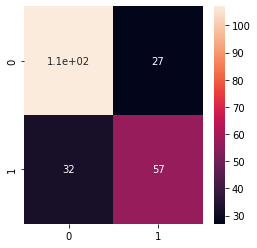

In [86]:
pkg_plot.figure(figsize=(4,4))
pkg_plot.xlabel('Predicted')
pkg_plot.xlabel('Actual')
pkg_seaborn.heatmap(cm, annot=True)